In [1]:
# ============================================================
# MACHINE LEARNING ASSIGNMENT – Q1.0 Dataset Generation
# Author: Isha Kulkarni

# ============================================================

# ---------------------------
# 1. Import Required Libraries
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

# ---------------------------
# 2. Generate Unique Random Seed from Email Username
# ---------------------------
# Replace 'yourusername' with your IIITH email username (before '@')
username = "yourusername"  

# Generate reproducible seed using SHA-256 hash (as per instructions)
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
rng = np.random.default_rng(seed)
print(f"Your unique random seed: {seed}")

# ---------------------------
# 3. Define the StudentDataset Class
# ---------------------------
class StudentDataset:
    """
    A class to generate and manage a synthetic student dataset.

    Attributes:
        num_students (int): Number of students to generate.
        seed (int): Random seed for reproducibility.
    """

    def __init__(self, num_students: int, seed: int):
        """
        Initializes the dataset generator and creates the dataset.
        """
        self.num_students = num_students
        self.seed = seed
        self.rng = np.random.default_rng(seed)
        self.df = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        """Generate gender distribution with given probabilities."""
        genders = ["Male", "Female", "Other"]
        probs = [0.65, 0.33, 0.02]
        return self.rng.choice(genders, size=self.num_students, p=probs).tolist()

    def generate_major(self) -> list[str]:
        """Generate major distribution with given probabilities."""
        majors = ["B.Tech", "MS", "PhD"]
        probs = [0.70, 0.20, 0.10]
        return self.rng.choice(majors, size=self.num_students, p=probs).tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        """Generate program distribution conditioned on the student's major."""
        programs = []
        for m in majors:
            if m == "B.Tech":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p=[0.4, 0.4, 0.1, 0.1]))
            elif m == "MS":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p=[0.3, 0.3, 0.2, 0.2]))
            else:  # PhD
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p=[0.25, 0.25, 0.25, 0.25]))
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        """Generate GPA based on normal distribution for each major."""
        gpas = []
        for m in majors:
            if m == "B.Tech":
                gpa = self.rng.normal(7.0, 1.0)
            elif m == "MS":
                gpa = self.rng.normal(8.0, 0.7)
            else:  # PhD
                gpa = self.rng.normal(8.3, 0.5)
            # Clip GPA to [4.0, 10.0]
            gpas.append(np.clip(gpa, 4.0, 10.0))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """Combine all attributes into a complete pandas DataFrame."""
        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        data = {
            "Gender": genders,
            "Major": majors,
            "Program": programs,
            "GPA": gpas
        }
        df = pd.DataFrame(data)
        return df

    def get_full_dataframe(self) -> pd.DataFrame:
        """Return the complete dataset."""
        return self.df

# ---------------------------
# 4. Instantiate and Display Dataset
# ---------------------------
dataset = StudentDataset(num_students=10000, seed=seed)
df = dataset.get_full_dataframe()

# Display first few rows
df.head()


Your unique random seed: 4215101788


,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,5.360929
1,Male,MS,CSE,7.776738
2,Female,MS,CND,6.604090
3,Male,B.Tech,CSE,5.545192
4,Male,B.Tech,ECE,7.080140


Dataset Shape: (10000, 4)

Sample Records:


,Gender,Major,Program,GPA
0,Male,B.Tech,ECE,5.360929
1,Male,MS,CSE,7.776738
2,Female,MS,CND,6.604090
3,Male,B.Tech,CSE,5.545192
4,Male,B.Tech,ECE,7.080140
5,Female,B.Tech,ECE,5.726226
6,Female,MS,CSE,10.000000
7,Male,PhD,ECE,7.923898
8,Male,B.Tech,CSE,7.835225
9,Male,MS,ECE,9.338537



Unique Values per Column:
Gender: ['Male' 'Female' 'Other']
Major: ['B.Tech' 'MS' 'PhD']
Program: [np.str_('ECE') np.str_('CSE') np.str_('CND') np.str_('CHD')]
GPA: [5.36092908 7.77673829 6.60408969 ... 7.5295578  7.10643593 8.65918141]

Gender distribution (%):
Gender
Male      64.86
Female    33.18
Other      1.96
Name: proportion, dtype: float64

Major distribution (%):
Major
B.Tech    70.34
MS        19.82
PhD        9.84
Name: proportion, dtype: float64

Program distribution (top 10 rows):
Program
ECE    3696
CSE    3625
CHD    1363
CND    1316
Name: count, dtype: int64

GPA range:
Min GPA: 4.00, Max GPA: 10.00


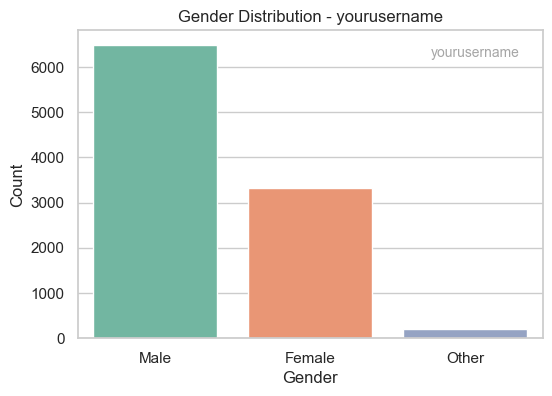

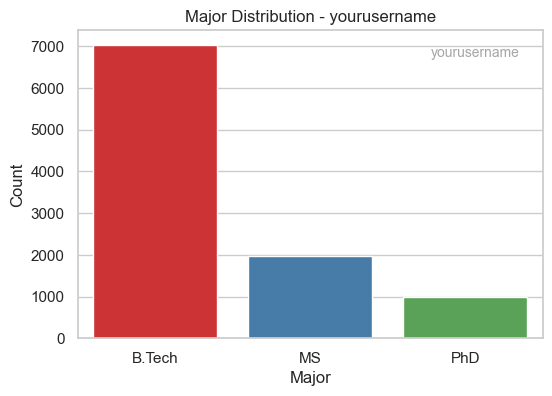

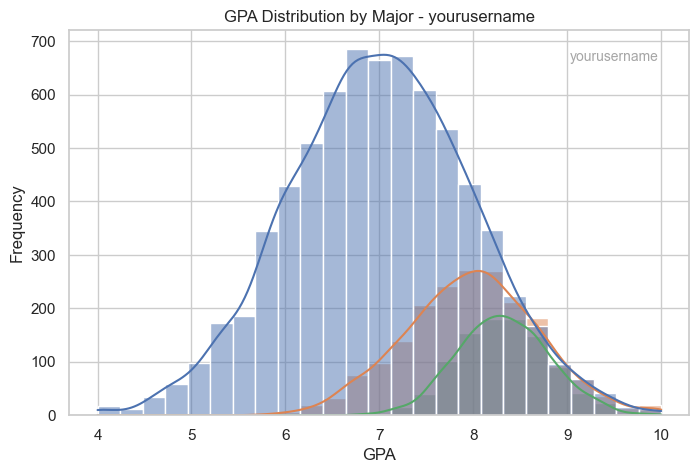

In [4]:
# -----------------------------------------------------
# ✅ Verify the Dataset Correctness
# -----------------------------------------------------

# 1. Dataset shape (should be 10,000 × 4)
print("Dataset Shape:", df.shape)

# 2. Check first few records again
print("\nSample Records:")
display(df.head(10))

# 3. Check unique values in each column
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

# 4. Verify proportions and distributions
print("\nGender distribution (%):")
print(df['Gender'].value_counts(normalize=True) * 100)

print("\nMajor distribution (%):")
print(df['Major'].value_counts(normalize=True) * 100)

print("\nProgram distribution (top 10 rows):")
print(df['Program'].value_counts().head(10))

print("\nGPA range:")
print(f"Min GPA: {df['GPA'].min():.2f}, Max GPA: {df['GPA'].max():.2f}")

# -----------------------------------------------------
# ✅ Visualization Section (clean, warning-free)
# -----------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# --- Gender distribution plot ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Gender", palette="Set2", legend=False)
plt.title(f"Gender Distribution - {username}")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.text(0.95, 0.95, username, ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=10, color='gray', alpha=0.7)
plt.show()

# --- Major distribution plot ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Major", hue="Major", palette="Set1", legend=False)
plt.title(f"Major Distribution - {username}")
plt.xlabel("Major")
plt.ylabel("Count")
plt.text(0.95, 0.95, username, ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=10, color='gray', alpha=0.7)
plt.show()

# --- GPA histogram by major ---
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="GPA", hue="Major", kde=True, bins=25, legend=True)
plt.title(f"GPA Distribution by Major - {username}")
plt.xlabel("GPA")
plt.ylabel("Frequency")

# Ensure proper legend display (avoids "No artists with labels found" warning)
handles, labels = plt.gca().get_legend_handles_labels()
if labels:
    plt.legend(title="Major")
else:
    plt.legend([], [], frameon=False)

plt.text(0.95, 0.95, username, ha='right', va='top', transform=plt.gca().transAxes,
         fontsize=10, color='gray', alpha=0.7)
plt.show()


In [5]:
# -----------------------------------------------------
# ✅ Export Full Dataset to CSV
# -----------------------------------------------------
output_filename = "student_dataset.csv"
df.to_csv(output_filename, index=False)
print(f"✅ Dataset saved successfully as '{output_filename}' in the current folder.")


✅ Dataset saved successfully as 'student_dataset.csv' in the current folder.


In [6]:
# ---------------------------
# Extended StudentDataset Class
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

class StudentDataset:
    """
    StudentDataset: generates and holds the dataset, and provides analysis & plotting methods.
    """

    def __init__(self, num_students: int, seed: int, username: str = "username"):
        """
        Generates the dataset once and stores it in self.df.
        """
        self.num_students = num_students
        self.seed = seed
        self.username = username
        self.rng = np.random.default_rng(seed)
        # If you already have df generated externally, you can skip generation and assign directly.
        self.df = self.assemble_dataframe()

    # -------------------- Generation methods (same as before) --------------------
    def generate_gender(self) -> list:
        """Generate gender distribution with given probabilities."""
        genders = ["Male", "Female", "Other"]
        probs = [0.65, 0.33, 0.02]
        return self.rng.choice(genders, size=self.num_students, p=probs).tolist()

    def generate_major(self) -> list:
        """Generate major distribution with given probabilities."""
        majors = ["B.Tech", "MS", "PhD"]
        probs = [0.70, 0.20, 0.10]
        return self.rng.choice(majors, size=self.num_students, p=probs).tolist()

    def generate_program(self, majors: list) -> list:
        """Generate program distribution conditioned on the student's major."""
        programs = []
        for m in majors:
            if m == "B.Tech":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p=[0.4, 0.4, 0.1, 0.1]))
            elif m == "MS":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p=[0.3, 0.3, 0.2, 0.2]))
            else:  # PhD
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p=[0.25, 0.25, 0.25, 0.25]))
        return programs

    def generate_gpa(self, majors: list) -> list:
        """Generate GPA based on normal distribution for each major; clipped to [4.0, 10.0]."""
        gpas = []
        for m in majors:
            if m == "B.Tech":
                gpa = self.rng.normal(7.0, 1.0)
            elif m == "MS":
                gpa = self.rng.normal(8.0, 0.7)
            else:  # PhD
                gpa = self.rng.normal(8.3, 0.5)
            gpas.append(np.clip(gpa, 4.0, 10.0))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """Assemble the generated columns into a pandas DataFrame and return it."""
        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)
        df = pd.DataFrame({
            "Gender": genders,
            "Major": majors,
            "Program": programs,
            "GPA": gpas
        })
        return df

    def get_full_dataframe(self) -> pd.DataFrame:
        """Return the full dataset DataFrame (do not regenerate)."""
        return self.df

    # -------------------- Q1.1 plotting methods --------------------
    def plot_gender_distribution(self) -> None:
        """Plot count of each gender."""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df, x="Gender", hue="Gender", palette="Set2", legend=False)
        plt.title(f"Gender Distribution - {self.username}")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_major_distribution(self) -> None:
        """Plot count of each major."""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df, x="Major", hue="Major", palette="Set1", legend=False)
        plt.title(f"Major Distribution - {self.username}")
        plt.xlabel("Major")
        plt.ylabel("Count")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_program_distribution(self) -> None:
        """Plot count of each program (across all majors)."""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df, x="Program", hue="Program", palette="pastel", legend=False)
        plt.title(f"Program Distribution - {self.username}")
        plt.xlabel("Program")
        plt.ylabel("Count")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_distribution(self, bins: int = 20) -> None:
        """Plot overall GPA distribution histogram with KDE."""
        plt.figure(figsize=(8,5))
        sns.histplot(data=self.df, x="GPA", kde=True, bins=bins)
        plt.title(f"GPA Distribution (All Students) - {self.username}")
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_program_by_major(self) -> None:
        """
        Visualize program distribution conditioned on major:
        a grouped barplot showing, for each Major, the counts of Program categories.
        """
        plt.figure(figsize=(8,5))
        order_programs = ["CSE","ECE","CHD","CND"]
        sns.countplot(data=self.df, x="Program", hue="Major", hue_order=["B.Tech","MS","PhD"])
        plt.title(f"Program Distribution conditioned on Major - {self.username}")
        plt.xlabel("Program")
        plt.ylabel("Count")
        plt.legend(title="Major")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_by_major(self) -> None:
        """Boxplot + stripplot of GPA grouped by Major to show distribution and outliers."""
        plt.figure(figsize=(8,5))
        sns.boxplot(data=self.df, x="Major", y="GPA")
        sns.stripplot(data=self.df, x="Major", y="GPA", color='black', size=1, alpha=0.3)
        plt.title(f"GPA by Major - {self.username}")
        plt.xlabel("Major")
        plt.ylabel("GPA")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_by_program(self) -> None:
        """Violin plot (or boxplot) of GPA per Program to see GPA spread by program."""
        plt.figure(figsize=(8,5))
        sns.violinplot(data=self.df, x="Program", y="GPA", inner="quartile")
        plt.title(f"GPA by Program - {self.username}")
        plt.xlabel("Program")
        plt.ylabel("GPA")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_by_program_and_major(self) -> None:
        """
        Faceted plots: GPA distributions for each (Program, Major) pair using seaborn FacetGrid.
        This produces small histograms by Program with hue=Major (or vice versa).
        """
        g = sns.FacetGrid(self.df, col="Program", row="Major", height=2.5, margin_titles=True)
        g.map(sns.histplot, "GPA", bins=15)
        plt.subplots_adjust(top=0.92)
        g.fig.suptitle(f"GPA by Program and Major (faceted) - {self.username}")
        plt.show()

    def plot_sampled_dataset(self, sample_n: int = 100, random_state: int = None) -> None:
        """Show gender, major, program and GPA for `sample_n` randomly sampled students as a table."""
        if random_state is None:
            random_state = self.seed
        sample_df = self.df.sample(n=sample_n, random_state=random_state).reset_index(drop=True)
        # Display nicely
        display(sample_df[["Gender", "Major", "Program", "GPA"]])
        # Also quick bar plot of sample composition
        plt.figure(figsize=(6,4))
        sns.countplot(data=sample_df, x="Major", hue="Major", legend=False)
        plt.title(f"Sampled {sample_n} Students - Major distribution - {self.username}")
        plt.xlabel("Major")
        plt.ylabel("Count")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()

    def plot_entire_dataset_summary(self, sample_for_plot: int = 2000) -> None:
        """
        Summary of entire dataset using pairplot-like visualization.
        Because pairplot gets heavy for 10k rows, we sample `sample_for_plot` rows for visualization.
        We create numeric codes for categorical columns so pairplot can visualize relationships.
        """
        draw_sample = self.df.sample(n=min(sample_for_plot, len(self.df)), random_state=self.seed)
        pf = draw_sample.copy()
        # create categorical codes for pairplot
        pf['Gender_code'] = pf['Gender'].astype('category').cat.codes
        pf['Major_code'] = pf['Major'].astype('category').cat.codes
        pf['Program_code'] = pf['Program'].astype('category').cat.codes
        vars_for_pair = ['GPA', 'Gender_code', 'Major_code', 'Program_code']
        sns.pairplot(pf[vars_for_pair], diag_kind='kde')
        plt.suptitle(f"Pairplot Summary (sampled {len(pf)} rows) - {self.username}", y=1.02)
        plt.show()

    # -------------------- Q1.1(b) GPA summary --------------------
    def gpa_mean_std(self) -> tuple:
        """Return (mean, std) of GPA across entire dataset."""
        mean = float(self.df['GPA'].mean())
        std = float(self.df['GPA'].std(ddof=1))
        return mean, std

    # -------------------- Q1.1(c) Program-Major counts & heatmap --------------------
    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """
        Count number of students for each (Program, Major) pair and return a pivot DataFrame:
        rows = Program, columns = Major, values = counts.
        """
        counts = self.df.groupby(['Program', 'Major']).size().unstack(fill_value=0)
        # Ensure consistent ordering
        counts = counts.reindex(index=["CSE","ECE","CHD","CND"], columns=["B.Tech","MS","PhD"], fill_value=0)
        return counts

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
        """Plot a heatmap of counts_df which is pivot of program vs major counts."""
        plt.figure(figsize=(6,4))
        sns.heatmap(counts_df, annot=True, fmt='d', cmap='YlGnBu')
        plt.title(f"Students per (Program, Major) pair - {self.username}")
        plt.xlabel("Major")
        plt.ylabel("Program")
        plt.text(0.95, 0.95, self.username, ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=9, color='gray', alpha=0.7)
        plt.show()


In [7]:
# reuse the username & seed you created earlier
# if you already created 'dataset' earlier, you can skip this instantiation.
username = "yourusername"   # replace with your actual username
seed = int(__import__('hashlib').sha256(username.encode()).hexdigest(), 16) % (2**32)

dataset = StudentDataset(num_students=10000, seed=seed, username=username)
df = dataset.get_full_dataframe()
print("Dataset ready with shape:", df.shape)


Dataset ready with shape: (10000, 4)


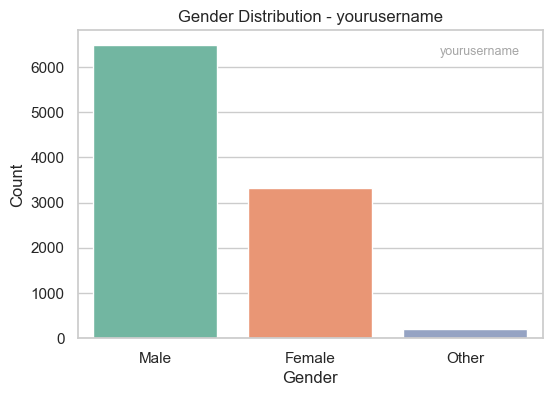

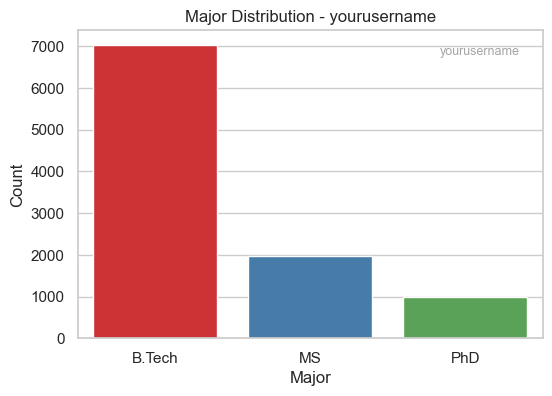

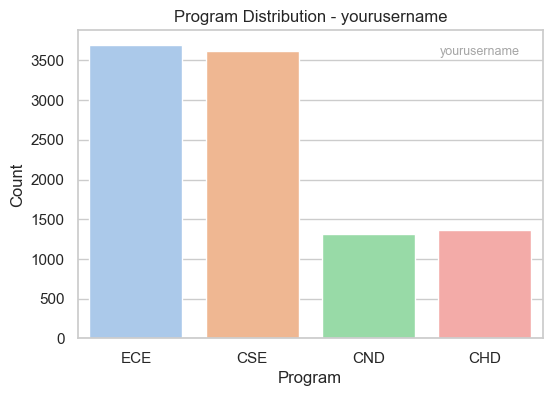

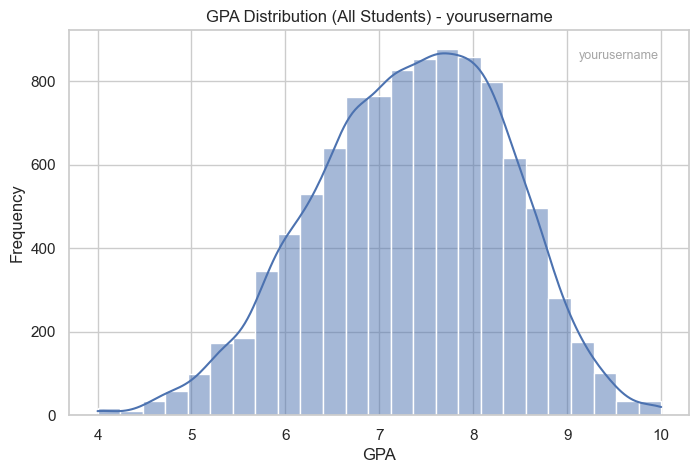

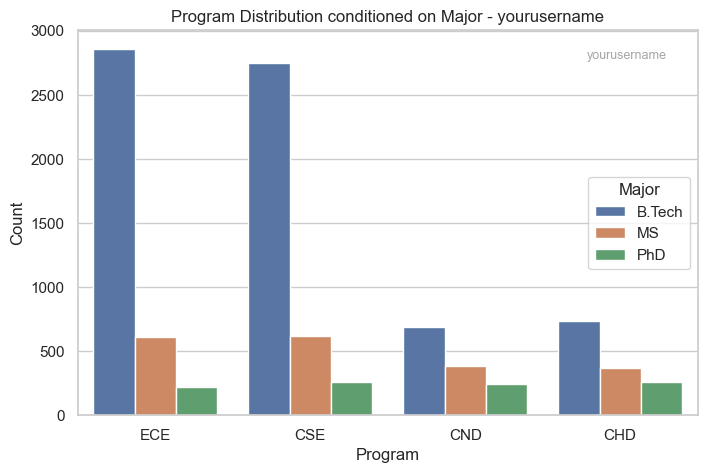

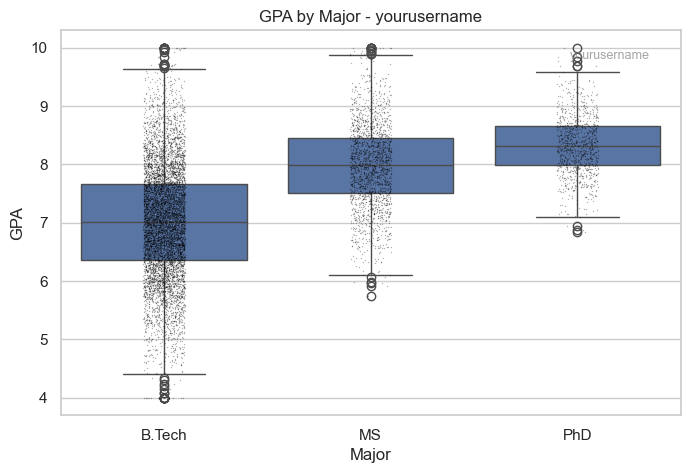

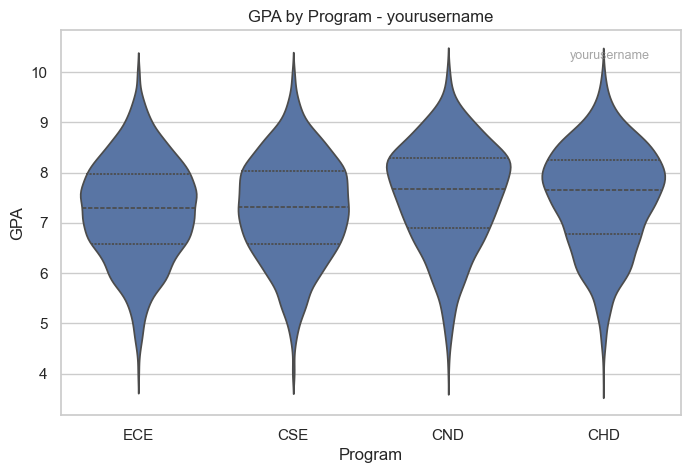

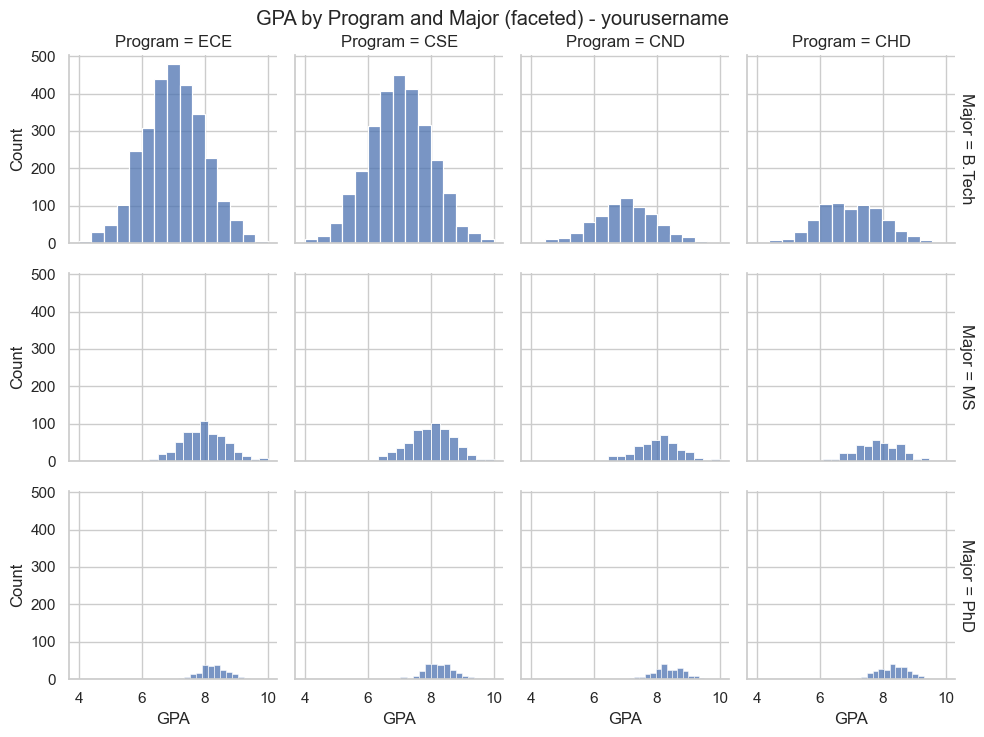

,Gender,Major,Program,GPA
0,Female,B.Tech,CND,5.876981
1,Male,B.Tech,ECE,7.644302
2,Male,MS,ECE,8.379199
3,Male,MS,ECE,7.508293
4,Male,B.Tech,CSE,5.806068
...,...,...,...,...
95,Female,B.Tech,ECE,7.285608
96,Male,B.Tech,CSE,6.171410
97,Male,B.Tech,ECE,4.878629
98,Female,B.Tech,ECE,7.430154


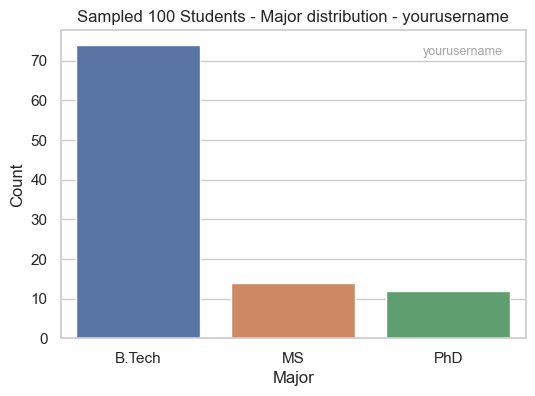

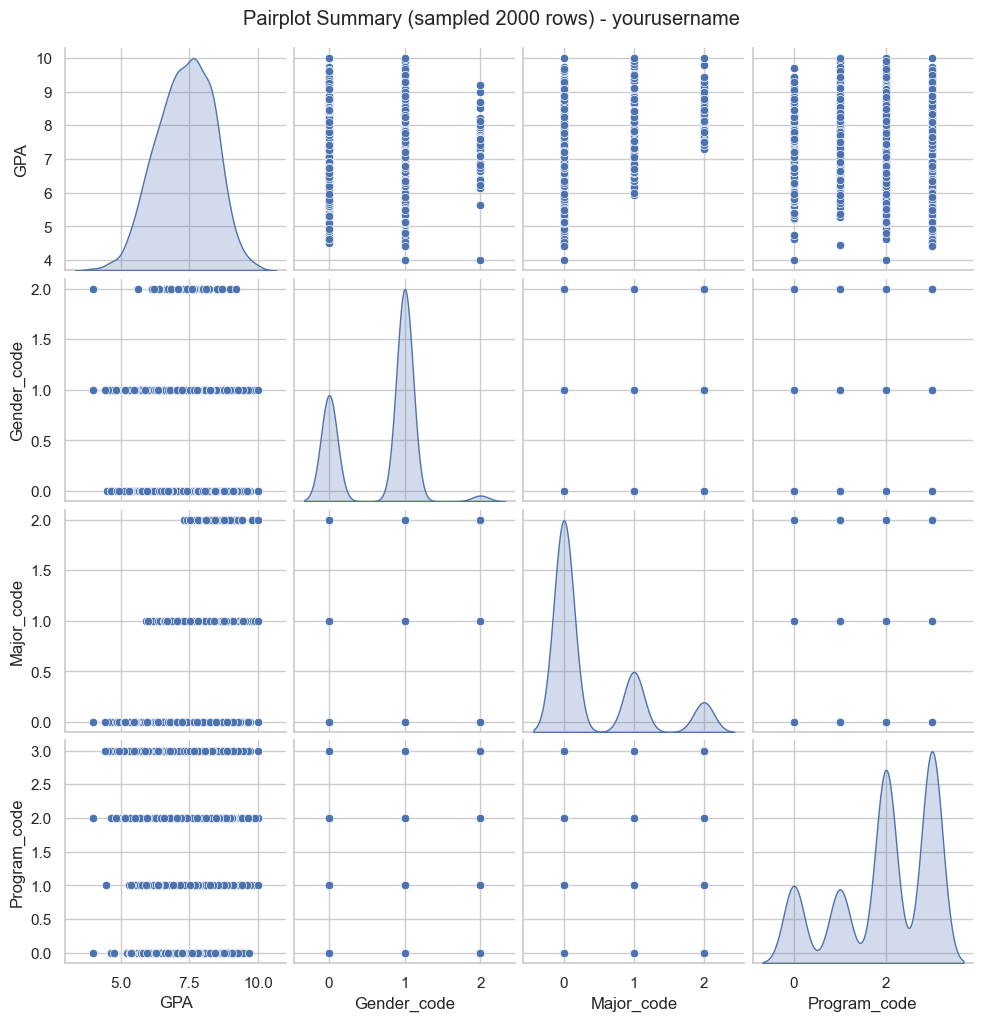

In [8]:
# a
# 1. gender distribution
dataset.plot_gender_distribution()

# 2. major distribution
dataset.plot_major_distribution()

# 3. program distribution
dataset.plot_program_distribution()

# 4. overall GPA distribution
dataset.plot_gpa_distribution(bins=25)

# 5. program conditioned on major
dataset.plot_program_by_major()

# 6. GPA conditioned on major
dataset.plot_gpa_by_major()

# 7. GPA conditioned on program
dataset.plot_gpa_by_program()

# 8. GPA conditioned on program and major (faceted)
dataset.plot_gpa_by_program_and_major()

# 9. gender, major, program and GPA of 100 randomly sampled students (table + small plot)
dataset.plot_sampled_dataset(sample_n=100)

# 10. Summary of entire dataset (pairplot-like sample)
dataset.plot_entire_dataset_summary(sample_for_plot=2000)


In [9]:
# b
mean_gpa, std_gpa = dataset.gpa_mean_std()
print(f"Mean GPA: {mean_gpa:.3f}")
print(f"Std  GPA: {std_gpa:.3f}")


Mean GPA: 7.335
Std  GPA: 1.020


Counts per (Program, Major):


Major,B.Tech,MS,PhD
Program,,,
CSE,2747,617,261
ECE,2861,611,224
CHD,738,367,258
CND,688,387,241


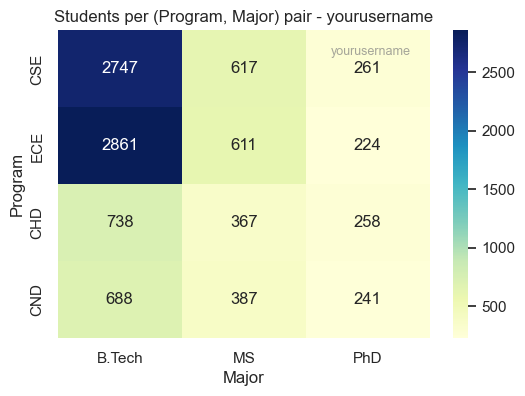

In [10]:
# c
counts_df = dataset.count_students_per_program_major_pair()
print("Counts per (Program, Major):")
display(counts_df)

# Visualize with heatmap
dataset.visualize_students_per_program_major_pair(counts_df)


In [13]:
# -----------------------------------------------------
# ✅ Q1.2 Simple vs Stratified Sampling [5 Marks]
# -----------------------------------------------------

import numpy as np
import pandas as pd

# Assuming 'df' (the dataset) is already created earlier
# and you have StudentDataset class defined for Q1.1

class StudentDataset:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    # -------------------------------------------------
    # ✅ Method 1: Simple Random Sampling
    # -------------------------------------------------
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """
        Performs simple random sampling 'repeats' times.
        Each time, selects 'n' random students and calculates:
          - Mean GPA of the sample
          - Standard deviation of sample means across all repeats
        Returns:
          (average_mean_GPA, std_of_means)
        """
        sample_means = []
        for _ in range(repeats):
            # Randomly select n students without replacement
            sample = self.df.sample(n=n, replace=False)
            sample_means.append(sample["GPA"].mean())

        # Compute the overall mean and std deviation of sample means
        avg_mean = np.mean(sample_means)
        std_of_means = np.std(sample_means)
        return avg_mean, std_of_means

    # -------------------------------------------------
    # ✅ Method 2: Stratified Sampling by Major
    # -------------------------------------------------
    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """
        Performs stratified sampling based on 'Major'.
        Each stratum (Major) is sampled according to its proportion in the dataset.
        Repeats this process multiple times and returns:
          (average_mean_GPA, std_of_means)
        """
        sample_means = []
        majors = self.df["Major"].unique()
        major_counts = self.df["Major"].value_counts(normalize=True)  # proportion of each major

        for _ in range(repeats):
            stratified_sample = pd.DataFrame()
            for major in majors:
                major_df = self.df[self.df["Major"] == major]
                proportion = major_counts[major]
                n_major = int(n * proportion)
                # Ensure at least one sample from each major
                n_major = max(1, n_major)
                major_sample = major_df.sample(n=n_major, replace=False)
                stratified_sample = pd.concat([stratified_sample, major_sample])

            sample_means.append(stratified_sample["GPA"].mean())

        avg_mean = np.mean(sample_means)
        std_of_means = np.std(sample_means)
        return avg_mean, std_of_means


# -----------------------------------------------------
# ✅ Run Sampling Experiments
# -----------------------------------------------------

# Create dataset object from your existing df
dataset = StudentDataset(df)

n = 500
repeats = 50

# Run both methods
avg_mean_random, std_of_means_random = dataset.get_gpa_mean_std_random(n=n, repeats=repeats)
avg_mean_strat, std_of_means_strat = dataset.get_gpa_mean_std_stratified(n=n, repeats=repeats)

# Display Results
print("=== Simple Random Sampling ===")
print(f"Average of sample means (over {repeats} repeats): {avg_mean_random:.4f}")
print(f"Std deviation of sample means: {std_of_means_random:.5f}\n")

print("=== Stratified Sampling (by Major) ===")
print(f"Average of sample means (over {repeats} repeats): {avg_mean_strat:.4f}")
print(f"Std deviation of sample means: {std_of_means_strat:.5f}\n")

# Which method performs better?
if std_of_means_strat < std_of_means_random:
    print("Result: Stratified sampling has LOWER std deviation of sample means.")
    print("Explanation: Stratified sampling ensures each major is represented proportionally, reducing variability.")
elif std_of_means_strat > std_of_means_random:
    print("Result: Simple random sampling has LOWER std deviation of sample means.")
    print("Explanation: In this case, random variation happened to yield slightly less spread among means.")
else:
    print("Result: Both methods have approximately equal std deviation of sample means.")
    print("Explanation: When the dataset is well-balanced, both sampling methods perform similarly.")


=== Simple Random Sampling ===
Average of sample means (over 50 repeats): 7.3415
Std deviation of sample means: 0.04879

=== Stratified Sampling (by Major) ===
Average of sample means (over 50 repeats): 7.3288
Std deviation of sample means: 0.03815

Result: Stratified sampling has LOWER std deviation of sample means.
Explanation: Stratified sampling ensures each major is represented proportionally, reducing variability.


=== Exact Gender-Balanced Sampling (5 repeats) ===
Repeat 1: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 2: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 3: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 4: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 5: {'Male': 100, 'Female': 100, 'Other': 100}

=== Sampling Strategy A (5 repeats) ===
Repeat 1: {'Female': 104, 'Other': 100, 'Male': 96}
Repeat 2: {'Male': 110, 'Female': 101, 'Other': 89}
Repeat 3: {'Other': 110, 'Female': 100, 'Male': 90}
Repeat 4: {'Male': 110, 'Female': 106, 'Other': 84}
Repeat 5: {'Male': 105, 'Female': 105, 'Other': 90}


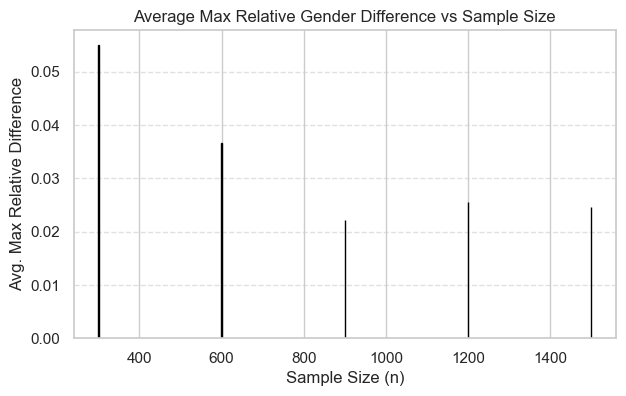

=== Average Max Relative Gender Difference ===
Sample Size 300: Avg. Max Relative Diff = 0.0550
Sample Size 600: Avg. Max Relative Diff = 0.0367
Sample Size 900: Avg. Max Relative Diff = 0.0221
Sample Size 1200: Avg. Max Relative Diff = 0.0256
Sample Size 1500: Avg. Max Relative Diff = 0.0245


In [14]:
# -----------------------------------------------------
# ✅ Q1.3 Gender-Balanced Cohort [5 Marks]
# -----------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class StudentDataset_Q13:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    # -------------------------------------------------
    # ✅ (a) Exact Gender-Balanced Sampling
    # -------------------------------------------------
    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """
        Samples 'n' students such that gender counts are exactly equal
        (same number of Male, Female, and Other if possible).
        Repeats this process multiple times and returns a list of gender counts.
        """
        genders = self.df["Gender"].unique()
        num_genders = len(genders)
        per_gender = n // num_genders  # equal share
        results = []

        for _ in range(repeats):
            sampled_df = pd.DataFrame()
            for gender in genders:
                gender_df = self.df[self.df["Gender"] == gender]
                sample = gender_df.sample(n=per_gender, replace=False)
                sampled_df = pd.concat([sampled_df, sample])

            counts = sampled_df["Gender"].value_counts().to_dict()
            results.append(counts)

        return results

    # -------------------------------------------------
    # ✅ (b) Sampling Strategy A (Random Category Pick)
    # -------------------------------------------------
    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """
        Sampling Strategy A:
        - Randomly choose a gender category with equal probability.
        - Randomly pick a student from that gender group.
        - Repeat until total 'n' students are sampled.
        Repeats 5 times and returns gender counts per iteration.
        """
        genders = self.df["Gender"].unique()
        gender_groups = {g: self.df[self.df["Gender"] == g] for g in genders}
        results = []

        for _ in range(repeats):
            sampled_students = []
            chosen_genders = np.random.choice(genders, size=n, replace=True)  # equal prob for each gender

            for gender in chosen_genders:
                gender_df = gender_groups[gender]
                sampled_students.append(gender_df.sample(n=1).iloc[0])

            sampled_df = pd.DataFrame(sampled_students)
            counts = sampled_df["Gender"].value_counts().to_dict()
            results.append(counts)

        return results

    # -------------------------------------------------
    # ✅ (c) Plot Avg. Max Relative Difference vs Sample Size
    # -------------------------------------------------
    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
        """
        For each sample size:
        - Repeat Strategy A sampling 'repeats' times.
        - For each repeat, compute difference between max & min gender counts,
          divide by sample size (relative difference).
        - Compute average of these differences.
        Plots a histogram of average max relative difference vs sample size.
        """
        avg_max_diff_list = []

        for n in sample_sizes:
            max_diffs = []
            for _ in range(repeats):
                # Apply Strategy A sampling
                counts_list = self.sample_gender_uniform_random(n=n, repeats=1)[0]
                max_diff = (max(counts_list.values()) - min(counts_list.values())) / n
                max_diffs.append(max_diff)

            avg_max_diff = np.mean(max_diffs)
            avg_max_diff_list.append(avg_max_diff)

        # Plot the results
        plt.figure(figsize=(7, 4))
        plt.bar(sample_sizes, avg_max_diff_list, color='skyblue', edgecolor='black')
        plt.title("Average Max Relative Gender Difference vs Sample Size")
        plt.xlabel("Sample Size (n)")
        plt.ylabel("Avg. Max Relative Difference")
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

        # Print the numeric results
        print("=== Average Max Relative Gender Difference ===")
        for n, diff in zip(sample_sizes, avg_max_diff_list):
            print(f"Sample Size {n}: Avg. Max Relative Diff = {diff:.4f}")


# -----------------------------------------------------
# ✅ Run the Gender-Balanced Experiments
# -----------------------------------------------------

# Reuse the same dataset DataFrame from previous question
gender_dataset = StudentDataset_Q13(df)

# (a) Exact gender-balanced sampling
balanced_counts = gender_dataset.get_gender_balanced_counts(n=300, repeats=5)
print("=== Exact Gender-Balanced Sampling (5 repeats) ===")
for i, counts in enumerate(balanced_counts, 1):
    print(f"Repeat {i}: {counts}")

# (b) Sampling Strategy A
strategyA_counts = gender_dataset.sample_gender_uniform_random(n=300, repeats=5)
print("\n=== Sampling Strategy A (5 repeats) ===")
for i, counts in enumerate(strategyA_counts, 1):
    print(f"Repeat {i}: {counts}")

# (c) Average Max Relative Difference Plot
sample_sizes = [300, 600, 900, 1200, 1500]
gender_dataset.plot_avg_max_gender_diff_vs_sample_size(sample_sizes=sample_sizes, repeats=10)


In [18]:
print(df.columns)


Index(['Gender', 'Major', 'Program', 'GPA'], dtype='object')


=== Simple Random Sampling ===
Average Mean GPA: 7.3333, Std of Means: 0.05090
=== Stratified Sampling ===
Average Mean GPA: 7.3321, Std of Means: 0.03740
Gender-balanced samples:
Repeat 1: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 2: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 3: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 4: {'Male': 100, 'Female': 100, 'Other': 100}
Repeat 5: {'Male': 100, 'Female': 100, 'Other': 100}
Uniform random gender sampling results:
Repeat 1: {'Other': 111, 'Male': 96, 'Female': 93}
Repeat 2: {'Other': 104, 'Female': 104, 'Male': 92}
Repeat 3: {'Female': 102, 'Male': 100, 'Other': 98}
Repeat 4: {'Male': 113, 'Female': 104, 'Other': 83}
Repeat 5: {'Other': 106, 'Female': 106, 'Male': 88}


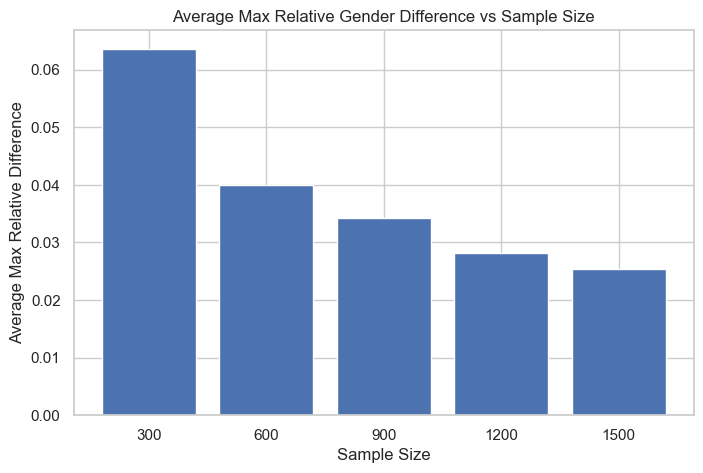

C:\Users\kulka\AppData\Local\Temp\ipykernel_29640\914619033.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in self.df.groupby('GPA_bin'):


Sampled 100 students with approximately uniform GPA distribution.


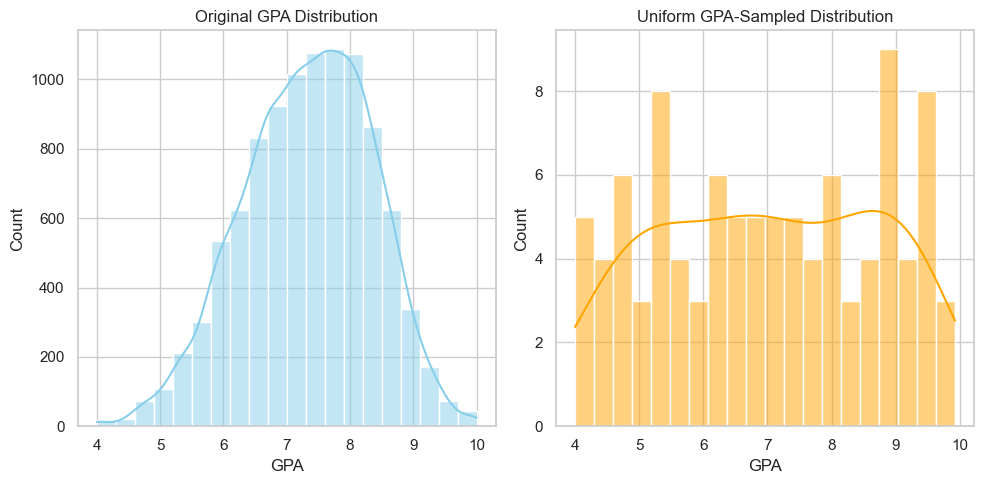

In [19]:
# Q.1.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class StudentSampler:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    # --- Q1.2 Simple vs Stratified Sampling ---
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        means = []
        for _ in range(repeats):
            sample = self.df.sample(n=n, replace=False)
            means.append(sample['GPA'].mean())
        avg_mean = np.mean(means)
        std_of_means = np.std(means)
        return avg_mean, std_of_means

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        majors = self.df['Major'].unique()
        means = []
        for _ in range(repeats):
            stratified_samples = []
            for major in majors:
                group = self.df[self.df['Major'] == major]
                prop = len(group) / len(self.df)
                sample_size = int(n * prop)
                stratified_samples.append(group.sample(n=sample_size, replace=False))
            stratified_df = pd.concat(stratified_samples)
            means.append(stratified_df['GPA'].mean())
        avg_mean = np.mean(means)
        std_of_means = np.std(means)
        return avg_mean, std_of_means

    # --- Q1.3 Gender-Balanced Cohort ---
    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        results = []
        genders = self.df['Gender'].unique()
        per_gender = n // len(genders)
        for _ in range(repeats):
            samples = [self.df[self.df['Gender'] == g].sample(per_gender, replace=False) for g in genders]
            combined = pd.concat(samples)
            counts = combined['Gender'].value_counts().to_dict()
            results.append(counts)
        print("Gender-balanced samples:")
        for i, c in enumerate(results, 1):
            print(f"Repeat {i}: {c}")
        return results

    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        results = []
        genders = self.df['Gender'].unique()
        for _ in range(repeats):
            chosen_genders = np.random.choice(genders, size=n, replace=True)
            sampled_students = []
            for g in chosen_genders:
                student = self.df[self.df['Gender'] == g].sample(1)
                sampled_students.append(student)
            combined = pd.concat(sampled_students)
            counts = combined['Gender'].value_counts().to_dict()
            results.append(counts)
        print("Uniform random gender sampling results:")
        for i, c in enumerate(results, 1):
            print(f"Repeat {i}: {c}")
        return results

    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
        avg_max_rel_diffs = []
        genders = self.df['Gender'].unique()

        for n in sample_sizes:
            max_rel_diffs = []
            for _ in range(repeats):
                chosen_genders = np.random.choice(genders, size=n, replace=True)
                sampled_students = []
                for g in chosen_genders:
                    student = self.df[self.df['Gender'] == g].sample(1)
                    sampled_students.append(student)
                combined = pd.concat(sampled_students)
                counts = combined['Gender'].value_counts()
                diff = counts.max() - counts.min()
                rel_diff = diff / n
                max_rel_diffs.append(rel_diff)
            avg_max_rel_diffs.append(np.mean(max_rel_diffs))

        plt.figure(figsize=(8, 5))
        plt.bar([str(s) for s in sample_sizes], avg_max_rel_diffs)
        plt.xlabel("Sample Size")
        plt.ylabel("Average Max Relative Difference")
        plt.title("Average Max Relative Gender Difference vs Sample Size")
        plt.show()

    # --- Q1.4 GPA-Uniform Cohort ---
    def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
        self.df['GPA_bin'] = pd.cut(self.df['GPA'], bins=bins)
        sampled = []
        for _, group in self.df.groupby('GPA_bin'):
            if len(group) > 0:
                sample_size = max(1, int(n / bins))
                sampled.append(group.sample(n=min(sample_size, len(group)), replace=False))
        sampled_df = pd.concat(sampled)
        print(f"Sampled {len(sampled_df)} students with approximately uniform GPA distribution.")
        return sampled_df

    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(self.df['GPA'], bins=20, kde=True, color='skyblue')
        plt.title("Original GPA Distribution")
        plt.subplot(1, 2, 2)
        sns.histplot(sampled_df['GPA'], bins=20, kde=True, color='orange')
        plt.title("Uniform GPA-Sampled Distribution")
        plt.tight_layout()
        plt.show()

# ===============================
# Run Section
# ===============================
df = pd.read_csv("student_dataset.csv")

sampler = StudentSampler(df)

# Q1.2
n = 500
repeats = 50
avg_mean_random, std_of_means_random = sampler.get_gpa_mean_std_random(n=n, repeats=repeats)
avg_mean_strat, std_of_means_strat = sampler.get_gpa_mean_std_stratified(n=n, repeats=repeats)
print("=== Simple Random Sampling ===")
print(f"Average Mean GPA: {avg_mean_random:.4f}, Std of Means: {std_of_means_random:.5f}")
print("=== Stratified Sampling ===")
print(f"Average Mean GPA: {avg_mean_strat:.4f}, Std of Means: {std_of_means_strat:.5f}")

# Q1.3
sampler.get_gender_balanced_counts()
sampler.sample_gender_uniform_random()
sampler.plot_avg_max_gender_diff_vs_sample_size([300, 600, 900, 1200, 1500])

# Q1.4
sampled_df = sampler.sample_gpa_uniform()
sampler.plot_gpa_histogram_comparison(sampled_df)


In [20]:
# Q. 1.5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class StudentSampler:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    # Q1.5: Program–Major Balanced Cohort
    def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
        """
        Select 'n' students such that all (Program, Major) combinations
        are approximately equally represented.
        Strategy:
        - Group by both 'Program' and 'Major'
        - Determine total groups and samples per group
        - If a group has fewer members than required, sample with replacement
        """
        # Group the dataset by Program and Major
        grouped = self.df.groupby(['Program', 'Major'])
        groups = list(grouped.groups.keys())

        # Calculate number of samples per group
        samples_per_group = max(1, n // len(groups))

        sampled_list = []
        for group_key, group_df in grouped:
            if len(group_df) >= samples_per_group:
                # Enough students: sample without replacement
                sampled = group_df.sample(samples_per_group, replace=False, random_state=42)
            else:
                # Too few students: sample with replacement to balance representation
                sampled = group_df.sample(samples_per_group, replace=True, random_state=42)
            sampled_list.append(sampled)

        # Combine all sampled groups
        sampled_df = pd.concat(sampled_list).reset_index(drop=True)

        # Print sample summary
        print(f"Sampled {len(sampled_df)} students approximately balanced across Program–Major groups.")
        print("Program–Major group counts in sample:")
        print(sampled_df.groupby(['Program', 'Major']).size())

        return sampled_df

    # Function to show Program–Major counts and heatmap
    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
        """
        Display count table and heatmap for (Program, Major) combinations.
        """
        # Create a count pivot table
        count_table = sampled_df.groupby(['Program', 'Major']).size().unstack(fill_value=0)

        # Print the count table
        print("\nProgram–Major Count Table:")
        print(count_table)

        # Plot heatmap
        plt.figure(figsize=(8, 5))
        sns.heatmap(count_table, annot=True, fmt='d', cmap='Blues')
        plt.title('Program–Major Balanced Cohort Heatmap')
        plt.xlabel('Major')
        plt.ylabel('Program')
        plt.show()


Sampled 60 students approximately balanced across Program–Major groups.
Program–Major group counts in sample:
Program  Major 
CHD      B.Tech    5
         MS        5
         PhD       5
CND      B.Tech    5
         MS        5
         PhD       5
CSE      B.Tech    5
         MS        5
         PhD       5
ECE      B.Tech    5
         MS        5
         PhD       5
dtype: int64

Program–Major Count Table:
Major    B.Tech  MS  PhD
Program                 
CHD           5   5    5
CND           5   5    5
CSE           5   5    5
ECE           5   5    5


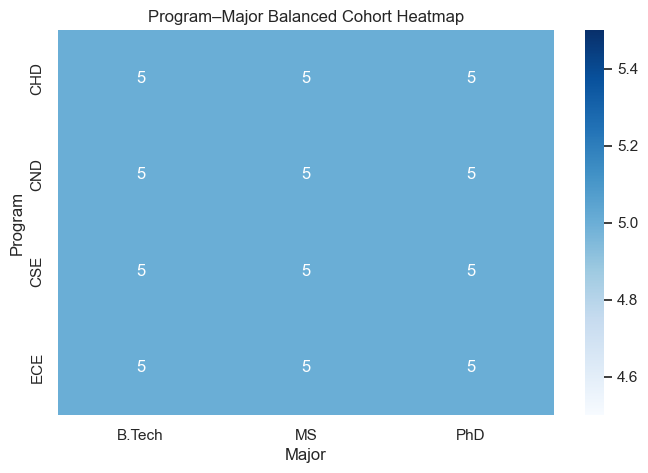

In [21]:
# Create an instance of StudentSampler
sampler = StudentSampler(df)   # df = your full student dataset

# Call Q1.5 methods
sampled_pm_df = sampler.sample_program_major_balanced(n=60)
sampler.show_program_major_counts_and_heatmap(sampled_pm_df)


Plotting Accuracy vs K for Euclidean distance...


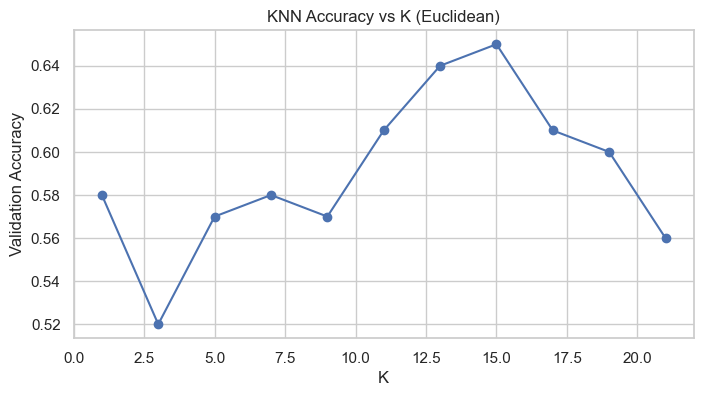


Computing Validation F1-scores for multiple distances...


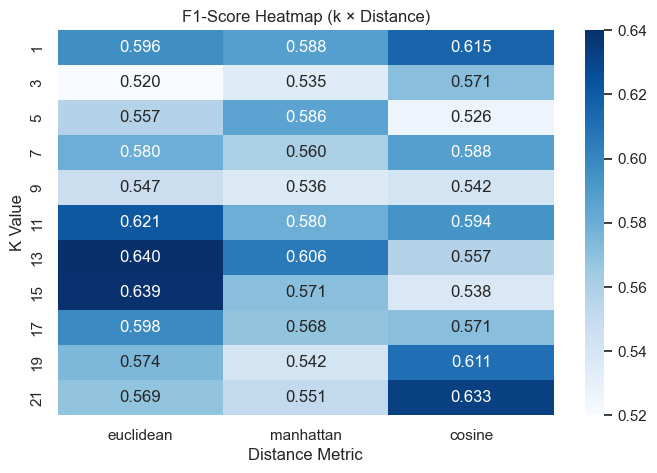


F1-Score Table:
    euclidean  manhattan    cosine
1    0.596154   0.588235  0.615385
3    0.520000   0.534653  0.571429
5    0.556701   0.585859  0.526316
7    0.580000   0.560000  0.588235
9    0.547368   0.536082  0.541667
11   0.621359   0.580000  0.594059
13   0.640000   0.606061  0.556701
15   0.639175   0.571429  0.537634
17   0.597938   0.568421  0.571429
19   0.574468   0.541667  0.610526
21   0.568627   0.551020  0.632653


In [24]:
# ===============================
# Q2.0 – k-Nearest Neighbors [30 marks]
# ===============================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# ======================================
# Helper Class: PerFeatureTransformer
# ======================================
class PerFeatureTransformer:
    def __init__(self):
        """Initializes memory for per-feature transformers."""
        self.transformers = {}
        self._feature_output_dims = {}

    def fit(self, df: pd.DataFrame, params: dict[str, str]) -> None:
        """Fits transformers for each feature based on transformation type."""
        for feature, ttype in params.items():
            col = df[[feature]]

            if ttype == "standard":
                scaler = StandardScaler()
                scaler.fit(col)
                self.transformers[feature] = ("standard", scaler)
                self._feature_output_dims[feature] = 1

            elif ttype == "ordinal":
                enc = OrdinalEncoder()
                enc.fit(col)
                self.transformers[feature] = ("ordinal", enc)
                self._feature_output_dims[feature] = 1

            elif ttype == "onehot":
                # ✅ Compatible with all sklearn versions
                try:
                    enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
                except TypeError:
                    enc = OneHotEncoder(sparse=False, handle_unknown="ignore")
                enc.fit(col.astype(str))
                self.transformers[feature] = ("onehot", enc)
                self._feature_output_dims[feature] = len(enc.get_feature_names_out())

    def transform(self, df: pd.DataFrame) -> np.ndarray:
        """Applies fitted transformers and returns combined NumPy array."""
        arrays = []
        for feature, (ttype, transformer) in self.transformers.items():
            col = df[[feature]]
            arr = transformer.transform(col.astype(str)) if ttype == "onehot" else transformer.transform(col)
            arrays.append(arr)
        return np.hstack(arrays)

    def fit_transform(self, df: pd.DataFrame, params: dict[str, str]) -> np.ndarray:
        """Fits and transforms in one step."""
        self.fit(df, params)
        return self.transform(df)


# ======================================
# Class: KNNGenderPredictor
# ======================================
class KNNGenderPredictor:
    def __init__(self, student_df: pd.DataFrame, username: str):
        """Initializes predictor with full student dataset."""
        self.df = student_df.copy()
        self.username = username
        self.pft = None

    def train_val_test_split(self, test_size=0.2, val_size=0.2, seed=42):
        """Splits dataset into train/val/test."""
        train_val, test = train_test_split(self.df, test_size=test_size, random_state=seed, stratify=self.df["gender"])
        rel_val = val_size / (1 - test_size)
        train, val = train_test_split(train_val, test_size=rel_val, random_state=seed, stratify=train_val["gender"])
        self.train_df, self.val_df, self.test_df = train, val, test
        return train, val, test

    def fit_transformers(self, features, params):
        """Fits feature transformers on training data."""
        params_sub = {f: params[f] for f in features}
        self.pft = PerFeatureTransformer()
        self.pft.fit(self.train_df, params_sub)

    def get_feature_matrix_and_labels(self, df: pd.DataFrame, features: list[str]) -> tuple[np.ndarray, np.ndarray]:
        """Extracts feature matrix and gender labels."""
        X = self.pft.transform(df[features])
        y = (df["gender"] == "Male").astype(int).values
        return X, y

    def get_knn_accuracy_vs_k(self, k_values, features, params, distance="euclidean") -> list[float]:
        """Calculates accuracy scores for various k on validation set."""
        self.fit_transformers(features, params)
        X_train, y_train = self.get_feature_matrix_and_labels(self.train_df, features)
        X_val, y_val = self.get_feature_matrix_and_labels(self.val_df, features)

        accs = []
        for k in k_values:
            model = KNeighborsClassifier(n_neighbors=k, metric=distance)
            model.fit(X_train, y_train)
            preds = model.predict(X_val)
            accs.append(accuracy_score(y_val, preds))
        return accs

    def plot_knn_accuracy_vs_k(self, k_values, features, params, distance="euclidean"):
        """Plots accuracy vs k."""
        accs = self.get_knn_accuracy_vs_k(k_values, features, params, distance=distance)
        plt.figure(figsize=(8, 4))
        plt.plot(k_values, accs, marker='o')
        plt.title(f"KNN Accuracy vs K ({distance.capitalize()})")
        plt.xlabel("K")
        plt.ylabel("Validation Accuracy")
        plt.grid(True)
        plt.show()

    def get_knn_f1_heatmap(self, k_values, distances, features, params) -> pd.DataFrame:
        """Returns dataframe with F1-scores for (k × distance) on validation set."""
        self.fit_transformers(features, params)
        X_train, y_train = self.get_feature_matrix_and_labels(self.train_df, features)
        X_val, y_val = self.get_feature_matrix_and_labels(self.val_df, features)

        results = {}
        for dist in distances:
            scores = []
            for k in k_values:
                model = KNeighborsClassifier(n_neighbors=k, metric=dist)
                model.fit(X_train, y_train)
                preds = model.predict(X_val)
                scores.append(f1_score(y_val, preds))
            results[dist] = scores

        f1_df = pd.DataFrame(results, index=k_values)
        return f1_df

    def plot_knn_f1_heatmap(self, f1_scores_df):
        """Plots heatmap of F1-scores."""
        plt.figure(figsize=(8, 5))
        sns.heatmap(f1_scores_df, annot=True, cmap="Blues", fmt=".3f")
        plt.title("F1-Score Heatmap (k × Distance)")
        plt.xlabel("Distance Metric")
        plt.ylabel("K Value")
        plt.show()


# ================================
# Example Run (Q2.0 Full Execution)
# ================================

# Suppose df contains student features:
# Columns: ['GPA', 'program', 'major', 'credits_completed', 'gender']
# Replace this with your actual dataset
data = {
    "GPA": np.random.uniform(2.0, 4.0, 500),
    "program": np.random.choice(["BTech", "MTech"], 500),
    "major": np.random.choice(["IT", "CS", "EE"], 500),
    "credits_completed": np.random.randint(50, 200, 500),
    "gender": np.random.choice(["Male", "Female"], 500)
}
student_df = pd.DataFrame(data)

# Initialize predictor
predictor = KNNGenderPredictor(student_df, username="isha_kulkarni")

# Split dataset
train, val, test = predictor.train_val_test_split()

# Define features and transformation types
features = ["GPA", "program", "major", "credits_completed"]
params = {
    "GPA": "standard",
    "program": "onehot",
    "major": "onehot",
    "credits_completed": "standard"
}

# --- Q2.0 Part 1: Accuracy vs K (Euclidean) ---
print("Plotting Accuracy vs K for Euclidean distance...")
k_values = list(range(1, 22, 2))
predictor.plot_knn_accuracy_vs_k(k_values, features, params, distance="euclidean")

# --- Q2.0 Part 2: F1 Heatmap for (k × Distance) ---
print("\nComputing Validation F1-scores for multiple distances...")
distances = ["euclidean", "manhattan", "cosine"]
f1_df = predictor.get_knn_f1_heatmap(k_values, distances, features, params)
predictor.plot_knn_f1_heatmap(f1_df)
print("\nF1-Score Table:")
print(f1_df)


In [ ]:
# =============================================================
# Q3.0 Linear Regression with Regularization [30 Marks]
# =============================================================

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# -------------------------------------------------------------
# Step 1: Create Example Dataset
# -------------------------------------------------------------
np.random.seed(42)
df = pd.DataFrame({
    "age": np.random.randint(18, 25, 500),
    "study_hours": np.random.uniform(1, 10, 500),
    "program": np.random.choice(["CS", "IT", "ECE"], 500),
    "major": np.random.choice(["AI", "DS", "SE"], 500),
    "GPA": np.random.uniform(5.0, 10.0, 500)
})

# Split into train, val, and test
X = df.drop("GPA", axis=1)
y = df["GPA"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("✅ Dataset prepared successfully!")
print("Train size:", X_train.shape, "Validation size:", X_val.shape, "Test size:", X_test.shape)

# -------------------------------------------------------------
# Step 2: Define Polynomial Regression Function
# -------------------------------------------------------------
def run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                        degree=1, regularizer=None, reg_strength=0.0):
    """
    Fit a polynomial regression model with optional regularization.
    """

    # Identify feature types
    numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # Preprocessing: scale numeric + encode categorical
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # Polynomial expansion
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    # Choose model based on regularizer
    if regularizer == 'l1':
        model = Lasso(alpha=reg_strength, max_iter=10000)
    elif regularizer == 'l2':
        model = Ridge(alpha=reg_strength)
    else:
        model = LinearRegression()

    # Pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('poly', poly),
        ('regressor', model)
    ])

    # Train model
    pipe.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)
    y_test_pred = pipe.predict(X_test)

    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return {
        "train_mse": train_mse,
        "val_mse": val_mse,
        "test_mse": test_mse,
        "model": pipe
    }

# -------------------------------------------------------------
# Step 3: Train across degrees and regularizers
# -------------------------------------------------------------
degrees = [1, 2, 3, 4, 5, 6]
regularizers = [None, 'l1', 'l2']
results = {}

for reg in regularizers:
    print(f"\n==================== Regularizer: {reg} ====================")
    train_mse_list, val_mse_list = [], []

    for d in degrees:
        res = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                                  degree=d, regularizer=reg, reg_strength=0.01)
        train_mse_list.append(res["train_mse"])
        val_mse_list.append(res["val_mse"])
        print(f"Degree {d}: Train MSE = {res['train_mse']:.4f}, Val MSE = {res['val_mse']:.4f}")

    results[reg] = {"train": train_mse_list, "val": val_mse_list}

    # Plot
    plt.figure()
    plt.plot(degrees, train_mse_list, marker='o', label='Train MSE')
    plt.plot(degrees, val_mse_list, marker='o', label='Validation MSE')
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"Degree vs MSE ({'No Reg' if reg is None else reg.upper()})")
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------------------------------------------------
# Step 4: Regularization Strength Tuning
# -------------------------------------------------------------
best_degree = 2  # example, you can change based on results
reg_strengths = np.logspace(-3, 2, 10)

for reg in ['l1', 'l2']:
    val_mses = []
    print(f"\n==== Testing Regularization Strengths for {reg.upper()} ====")
    for alpha in reg_strengths:
        res = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                                  degree=best_degree, regularizer=reg, reg_strength=alpha)
        val_mses.append(res["val_mse"])
        print(f"α={alpha:.4f} -> Validation MSE={res['val_mse']:.4f}")

    plt.figure()
    plt.semilogx(reg_strengths, val_mses, marker='o')
    plt.xlabel("Regularization Strength (α)")
    plt.ylabel("Validation MSE")
    plt.title(f"{reg.upper()} Regularization (Degree={best_degree})")
    plt.grid(True)
    plt.show()

# -------------------------------------------------------------
# Step 5: Identify best model and print results
# -------------------------------------------------------------
print("\nSelecting best model based on Validation MSE...")
best_setup = None
lowest_val_mse = float('inf')

for reg in results:
    for i, val_mse in enumerate(results[reg]["val"]):
        if val_mse < lowest_val_mse:
            lowest_val_mse = val_mse
            best_setup = (reg, degrees[i])

print(f"\n✅ Best setup found: Regularizer = {best_setup[0]}, Degree = {best_setup[1]} (Val MSE = {lowest_val_mse:.4f})")

# -------------------------------------------------------------
# Step 6: Feature Importance (L1 vs L2)
# -------------------------------------------------------------
l1_model = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                               degree=best_setup[1], regularizer='l1', reg_strength=0.01)["model"]
l2_model = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                               degree=best_setup[1], regularizer='l2', reg_strength=0.01)["model"]

# Extract features
num_features = X_train.select_dtypes(include=np.number).columns.tolist()
cat_features = list(l1_model.named_steps['preprocessor']
                    .named_transformers_['cat'].get_feature_names_out())
all_features = num_features + cat_features
poly = l1_model.named_steps['poly']
expanded_features = poly.get_feature_names_out(all_features)

# L1 Non-zero weights
l1_coefs = l1_model.named_steps['regressor'].coef_
nz_idx = np.where(l1_coefs != 0)[0]
print("\nTop Non-Zero Features (L1 Regularization):")
for i in nz_idx[:10]:
    print(f"{expanded_features[i]} → Coef: {l1_coefs[i]:.4f}")

# L2 Most Important
l2_coefs = l2_model.named_steps['regressor'].coef_
sorted_idx = np.argsort(np.abs(l2_coefs))[::-1][:10]
print("\nTop Features by Magnitude (L2 Regularization):")
for i in sorted_idx:
    print(f"{expanded_features[i]} → Coef: {l2_coefs[i]:.4f}")
